## Group_T

### Sophie Onuki

#### Section A Part A

#### Task 1: Decision Tree

In [ ]:
# QUESTION 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Loading all three datasets
partA_df = pd.read_csv('partA.csv')
new_input_df = pd.read_csv('new_input_data.csv')
new_output_df = pd.read_csv('new_output_data.csv')

# input and output features
X = partA_df.loc[:, partA_df.columns.str.startswith('in_')] # in features
y = partA_df.loc[:, partA_df.columns.str.startswith('out_')] # out features

# Create and train the Decision Tree model with a max_depth of 6 to prevent overfitting
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42) # max_depth = 6
dt_model.fit(X, y)

# Predicting the output from the new_input_sf
y_pred_dt = dt_model.predict(new_input_df)

# Calculate the mean squared error between predictions and actual values
dt_mse = mean_squared_error(new_output_df, y_pred_dt)
print(f"Decision Tree Test MSE: {dt_mse:.4f}")

# Plotting a scatter plot to visualize prediction accuracy for all outputs combined
true_all = new_output_df.values.flatten()
pred_all = y_pred_dt.flatten()

plt.figure(figsize=(6, 6))
plt.scatter(true_all, pred_all, alpha=0.5, s=20)
plt.plot([true_all.min(), true_all.max()], [true_all.min(), true_all.max()], 'r--')
plt.xlabel("True Values (All Outputs)")
plt.ylabel("Predicted Values (All Outputs)")
plt.title("Decision Tree: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()  # This line is now fixed


#### Task 2

In [ ]:
# QUESTION 2

from sklearn.model_selection import cross_val_score, KFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data
partA_df = pd.read_csv('partA.csv')
X = partA_df.loc[:, partA_df.columns.str.startswith('in_')]
y = partA_df.loc[:, partA_df.columns.str.startswith('out_')]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scoring
cv = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, multioutput='uniform_average')

# MLP Model
mlp_model = MultiOutputRegressor(
    MLPRegressor(hidden_layer_sizes=(256, 128),
                 max_iter=500,  # reduce for speed
                 early_stopping=True,
                 n_iter_no_change=10,
                 random_state=42)
)

# Run CV
mlp_scores = cross_val_score(mlp_model, X_scaled, y, cv=cv, scoring=mse_scorer, n_jobs=-1)
print(f"MLP CV MSE (10-fold): {mlp_scores.mean():.4f}")


#### Task 3

In [ ]:
# QUESTION 3

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler

# Load data
partA_df = pd.read_csv('partA.csv')
X = partA_df.loc[:, partA_df.columns.str.startswith('in_')]
y = partA_df.loc[:, partA_df.columns.str.startswith('out_')]

# Scale X for MLP
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define KFold
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Custom scoring (use positive MSE instead of negative)
mse_scorer = make_scorer(mean_squared_error, multioutput='uniform_average')

dt_model = MultiOutputRegressor(DecisionTreeRegressor(max_depth=6, random_state=42))
dt_scores = cross_val_score(dt_model, X, y, cv=cv, scoring=mse_scorer)
print(f"Decision Tree CV MSE (10-fold): {dt_scores.mean():.4f}")


mlp_model = MultiOutputRegressor(
    MLPRegressor(hidden_layer_sizes=(256, 128),
                 max_iter=500,
                 early_stopping=True,
                 n_iter_no_change=10,
                 random_state=42)
)
mlp_scores = cross_val_score(mlp_model, X_scaled, y, cv=cv, scoring=mse_scorer)
print(f"MLP CV MSE (10-fold): {mlp_scores.mean():.4f}")


#### Section A Part B

In [ ]:
from skimage.io import imread
from skimage.transform import rotate, resize
import matplotlib.pyplot as plt
import numpy as np

# Load image
group_image = imread("Group_T.png")

# Grid info
rows = 6
cols = 9
cell_height = group_image.shape[0] // rows
cell_width = group_image.shape[1] // cols

# Function to slice a cell
def get_cell_coords(row, col, trim=5):
    y_start = row * cell_height + trim
    y_end = (row + 1) * cell_height - trim
    x_start = col * cell_width + trim
    x_end = (col + 1) * cell_width - trim
    return y_start, y_end, x_start, x_end

# Coordinates for Sophie Onuki
sophie_coords = [(3, 8), (3, 2), (5, 1), (5, 4), (3, 6), (4, 6)]
onuki_coords = [(4, 3), (0, 4), (4, 4), (0, 7), (3, 6)]
full_coords = sophie_coords + onuki_coords

# Rotation angles for your name
rotation_angles = [
    -30,  # S
    -20,  # o
    0,    # p
    23,   # h
    0,    # i
    0,    # e
    0,    # O
    -20,  # n
    20,   # u
    -30,  # k
    -10   # i
]

# Extract and rotate letters
letter_images = []
for (r, c), angle in zip(full_coords, rotation_angles):
    y1, y2, x1, x2 = get_cell_coords(r, c, trim=5)
    letter = group_image[y1:y2, x1:x2]
    if angle != 0:
        letter = rotate(letter, angle=angle, resize=False, mode='edge')
    letter_images.append(letter)

# Add slim space between Sophie and Onuki
space_img = np.ones((cell_height, cell_width // 6, 3), dtype=np.uint8) * 255
sophie = letter_images[:6]
onuki = letter_images[6:]
letters = sophie + [space_img] + onuki

# Resize letters (optional, to uniform height)
resized_letters = [resize(letter, (100, int(letter.shape[1] * 100 / letter.shape[0])), anti_aliasing=True)
                   for letter in letters]

# Plot
fig, axes = plt.subplots(1, len(resized_letters), figsize=(len(resized_letters) * 2, 3), dpi=150)
if len(resized_letters) == 1:
    axes = [axes]

for ax, img in zip(axes, resized_letters):
    ax.imshow(img)
    ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout(pad=0)
plt.margins(0, 0)


### Ong Wei Xuan

#### Section A Part A

#### Task 1: Decision Tree 

To determine the best depth for a Decision Tree, the model's accuracy on the test set is evaluated using depths ranging from 1 to 20. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

from skimage import io
from skimage.transform import resize, rotate


In [2]:
partA_data = pd.read_csv('partA.csv')

# Separate input and output features
input_features = partA_data.filter(like='in_')
output_features = partA_data.filter(like='out_')

# Load validation datasets
new_input_dataset = pd.read_csv('new_input_data.csv')
new_output_dataset = pd.read_csv('new_output_data.csv')

X_train, X_test, y_train, y_test = train_test_split(
    input_features, output_features, test_size=0.2, random_state=42)

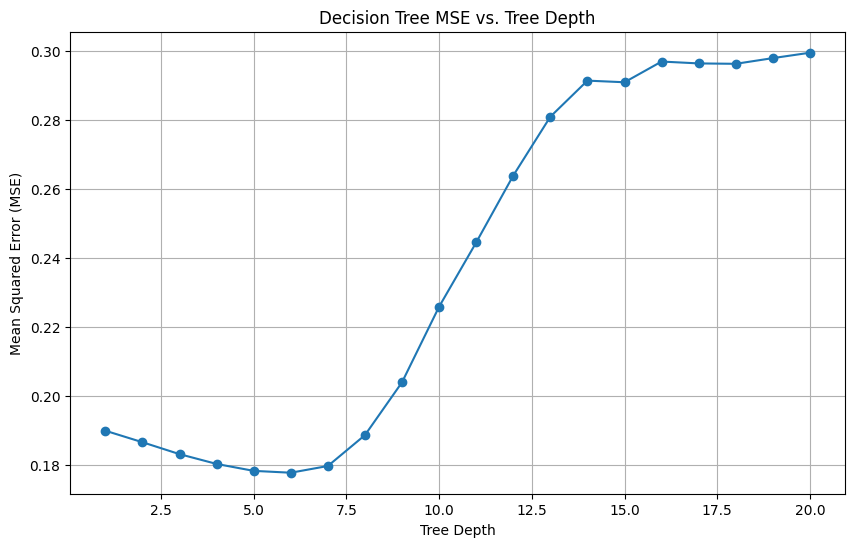

Best depth for Decision Tree: 6
MSE with best depth: 0.1777


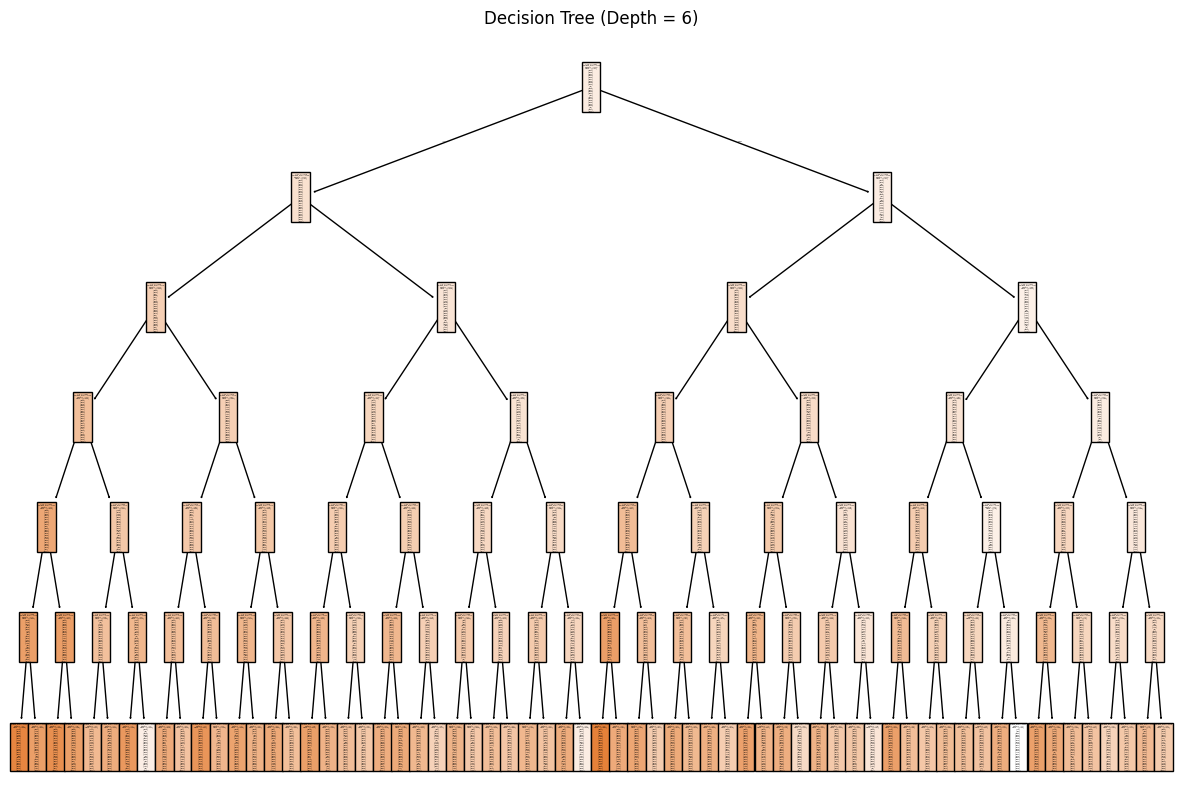

In [3]:
depths = range(1, 21)  # Testing depths from 1 to 20
mse_scores = [] #initialize list to hold MSE values for each depth tested

#loop through each depth and train the Decision Tree model
for depth in depths:
    dt_regressor = DecisionTreeRegressor(max_depth=depth, random_state=42) #max depth is set to current depth in the loop
    #random_state=42 ensures results are reproducible
    dt_regressor.fit(X_train, y_train) #train the model using treaining data
    predictions = dt_regressor.predict(X_test) #once the model is trained, it makes predictions on the test data
    mse = mean_squared_error(y_test, predictions) #compare hte predicted values with the actual values
    mse_scores.append(mse) #append the MSE for the current depth to the list

# Plot the MSE scores for different depths
plt.figure(figsize=(10, 6))
plt.plot(depths, mse_scores, marker='o')
plt.title('Decision Tree MSE vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# Find the best depth (select the lowest MSE)
best_depth = depths[np.argmin(mse_scores)]
best_mse = min(mse_scores)

print(f"Best depth for Decision Tree: {best_depth}")
print(f"MSE with best depth: {best_mse:.4f}")

# Visualize the decision tree with the best depth
best_dt = DecisionTreeRegressor(max_depth=best_depth, random_state=42) #create a new DecisionTreeRegressor with best depth found
best_dt.fit(X_train, y_train) #model is trained on training data again with best depth

plt.figure(figsize=(15, 10))
tree.plot_tree(best_dt, filled=True, feature_names=input_features.columns)
plt.title(f'Decision Tree (Depth = {best_depth})')
plt.show()

As shown in the graph above, the model achieves its highest accuracy when the tree depth is 6. 

Meawnwhile, the visualization shows the model splits the data based on the input features to make predictions. As the depth increases, the model will become more complex and may overfit the training data. Thus, selecting the optimal depth is vital to generalize well on unseen data. 

#### Task 2

MLP Train MSE: 0.0184
MLP Test MSE: 0.0218


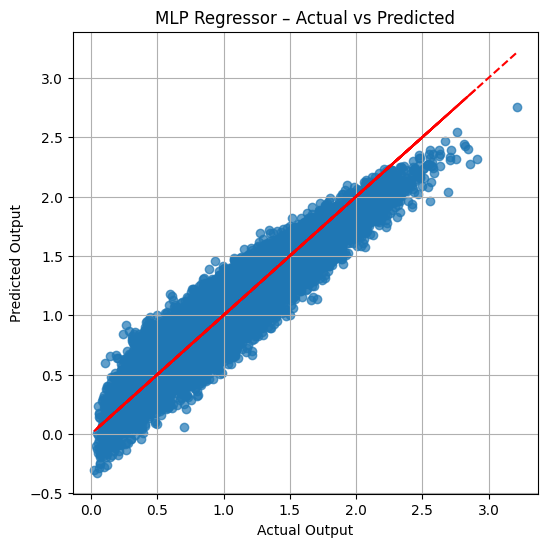

In [4]:
#Creating and training the MLP regression model with specified parameters
mlp_model = MLPRegressor(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42) #creates a network with 2 hidden layers
#it will train up to 500 iterations unless it converges earlier
mlp_model.fit(X_train, y_train) 

#make predictions
train_pred = mlp_model.predict(X_train) #the model's prediction for the training data
test_pred = mlp_model.predict(X_test) #test data (used to evaluate generalization)

#Calculate MSE for train and test datasets
train_mse = mean_squared_error(y_train, train_pred) #error on training data (how well the model fits known data)
test_mse = mean_squared_error(y_test, test_pred) #error on test data (how well it generalizes to unseen data)

print(f"MLP Train MSE: {train_mse:.4f}")
print(f"MLP Test MSE: {test_mse:.4f}")

#visualization of predicted vs. actual values for the test set
plt.figure(figsize=(6, 6))
plt.scatter(y_test, test_pred, alpha=0.7)
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.title("MLP Regressor – Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

The MLPRegressor is used to solve this task with the following parameters:
- Hidden layer sizes: (256, 128)
- Max iterations: 500
- Random state: 42

The model was trained on the 'X_train' and 'y_train' datasets, then evaluated on both the training and test sets using the Mean Squared Error (MSE) metric.

Results:
- MLP Train MSE: 0.0184
- MLP Test MSE: 0.0218

From the results, the values obtained indicate that the model performs slightly better on the training set than on the test set. This is because models usually fit the training data more closely. The low MSE values suggest that the neural network has learned the patterns in the data and is generalizing fairly well.

No significant overfitting is observed based on the gap between the training and test MSE.

#### Task 3: Cross validation of data using K-folds

In [7]:
#Set up K-Fold cross-validation (10 splits)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
#the dataset will be split into 10 folds
#in each round, 9 folds are used for training, and 1 fold is used for testing
#shuffle=True makes sure the data is shuffled before splitting
#random_state=42 maeks sure the same shuffling everytime it is run

#Store MSE results for decision tree regressor and MLP regressor respectively
dt_mse_scores = []
mlp_mse_scores = []

#loop through the 10 different splits created by kFold
for train_index, test_index in kf.split(input_features):
    X_train_cv, X_test_cv = input_features.iloc[train_index], input_features.iloc[test_index]
    y_train_cv, y_test_cv = output_features.iloc[train_index], output_features.iloc[test_index]

    # Decision Tree Regressor
    dt = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
    dt.fit(X_train_cv, y_train_cv)
    dt_pred = dt.predict(X_test_cv)
    dt_mse = mean_squared_error(y_test_cv, dt_pred)
    dt_mse_scores.append(dt_mse)

    # MLP Regressor (neural network)
    mlp = MLPRegressor(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42)
    mlp.fit(X_train_cv, y_train_cv)
    mlp_pred = mlp.predict(X_test_cv)
    mlp_mse = mean_squared_error(y_test_cv, mlp_pred)
    mlp_mse_scores.append(mlp_mse)

#convert lists to arrays
dt_mse_scores = np.array(dt_mse_scores)
mlp_mse_scores = np.array(mlp_mse_scores)

# Print results
print("Decision Tree CV MSE (per fold):", dt_mse_scores)
print("MLP CV MSE (per fold):", mlp_mse_scores)
print(f"Decision Tree Mean CV MSE: {dt_mse_scores.mean():.4f}")
print(f"MLP Mean CV MSE: {mlp_mse_scores.mean():.4f}")

Decision Tree CV MSE (per fold): [0.17584585 0.17818569 0.17780296 0.18263575 0.17526663 0.18112382
 0.1808532  0.17971997 0.17928484 0.17440513]
MLP CV MSE (per fold): [0.01912656 0.01942922 0.02216279 0.02268625 0.02195011 0.01997501
 0.01857236 0.02056167 0.02103117 0.02281422]
Decision Tree Mean CV MSE: 0.1785
MLP Mean CV MSE: 0.0208


Since cross_val_score() only supports 1D targets, and this task involves multi-output regression, K-Fold cross-validation approach is used from sklearn.model_selection
10-fold-cross-validation for both the decision tree regressor with optimized depth and the multi-layer perceptron (MLP) regressor was performed.

In each iteration, the dataset was split into training and testing sets, both models were trained on the training folds, and their performance was evaluated on the test fold using MSE.

Then, this process was repeated 10 times (once for each fold) and the MSEs were averaged to give an estimate of model performance.

#### Section A Part B

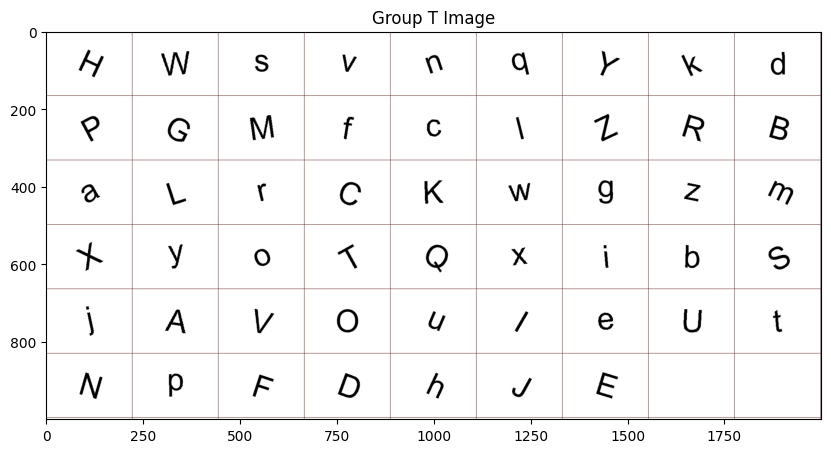

Image shape (height, width, channels): (1000, 2000, 3)
My name is Ong Wei Xuan, and I am slicing the image Group_T.png to extract my name.


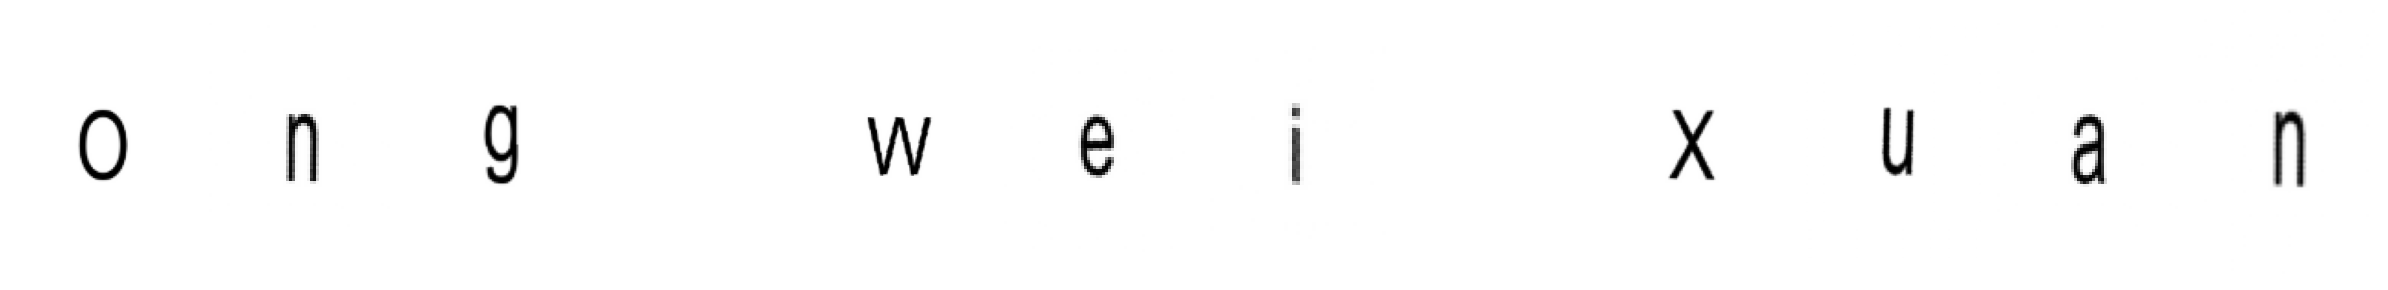

In [10]:
#Loading the image

group_image = io.imread('Group_T.png')

# Display original image
plt.figure(figsize=(10, 8))
plt.imshow(group_image)
plt.title('Group T Image')
plt.axis('on')
plt.show()

#Identifying the coordinates 
print("Image shape (height, width, channels):", group_image.shape)

print("My name is Ong Wei Xuan, and I am slicing the image Group_T.png to extract my name.")

rows = 6
cols = 9
cell_width = group_image.shape[1] // cols   
cell_height = group_image.shape[0] // rows  

def get_cell_coords(row, col, trim=5):  # trim = number of pixels to remove from each side
    y_start = row * cell_height + trim
    y_end = (row + 1) * cell_height - trim
    x_start = col * cell_width + trim
    x_end = (col + 1) * cell_width - trim
    return y_start, y_end, x_start, x_end



letters_coords = [
    (4, 3),  # O
    (0, 4),  # n
    (2, 6),  # g
    (5, 7),  # space
    (0, 1),  # W
    (4, 6),  # e
    (3, 6),  # i
    (5, 7),  # space (optional)
    (3, 0),  # X
    (4, 4),  # u
    (2, 0),  # a
    (0, 4),  # n
]

#Rotation angles for specific letters (same order as letters_coords)
# put 0 if no rotation needed
rotation_angles = [
    0,    # O
    -20,  # n
    0,    # g
    0,    # space
    -5,    # W
    -5,    # e
    -5,    # i
    0,    # space
    -30,   # X
    20,   # u
    -30,    # a
    -20,  # n
]

# Extract and rotate slices
letter_slices = []
for (r, c), angle in zip(letters_coords, rotation_angles):
    y1, y2, x1, x2 = get_cell_coords(r, c, trim=5)
    letter = group_image[y1:y2, x1:x2]
    if angle != 0:
        letter = rotate(letter, angle=angle, resize=False, mode='edge')
    letter_slices.append(letter)

#Define target sizes for each letter (height, width)
target_sizes = [
    (100, 100),  # O
    (80, 60),    # n
    (100, 90),    # g
    (20, 40),    # space
    (100, 120),  # W
    (70, 60),    # e
    (50, 45),    # i
    (20, 40),    # space
    (100, 100),  # X
    (130, 100),    # u
    (80, 60),    # a
    (90, 60),    # n
]

#Resize each letter manually
resized_letters = []
for letter, target_size in zip(letter_slices, target_sizes):
    resized_letter = resize(letter, target_size, anti_aliasing=True)
    resized_letters.append(resized_letter)

#Plot resized letters
fig, axes = plt.subplots(1, len(resized_letters), figsize=(len(resized_letters) * 2, 3))
for ax, img in zip(axes, resized_letters):
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


### Rebecca Anita

#### Section A Part A

#### Task 1: Decision Tree

**Objective**:  
To use a Decision Tree model to predict values from the `partA.csv` dataset and check how well it performs.

**Results**: 
- Mean Squared Error (MSE): 0.2996  
- The feature importance graph showed that only a few input features had a strong effect on the predictions.
- The scatter plot showed that most predictions were close to the actual values, with only a few points being far off.

 **Conclusion**:  
The Decision Tree model did well. The low MSE means that the model was resonably accurate and the graphs help explain which features were important and how close the predictions were to the real values.

In [ ]:
import pandas as pd

partA_data = pd.read_csv("partA.csv")
new_input_data = pd.read_csv("new_input_data.csv")
new_output_data = pd.read_csv("new_output_data.csv")

print(partA_data.head())
print(new_input_data.head())
print(new_output_data.head())

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Check for missing values in the dataset
print(partA_data.isnull().sum())  # This will print how many missing values are in each column if there are any.

# 2. Splitting the dataset into input (X) and output (y)
X = partA_data.filter(like='in_')  # Inputs
y = partA_data.filter(like='out_')  # Outputs

# 3. Split the data into training and testing sets (for cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature scaling
scaler = StandardScaler()

# Fit and transform on training data, and transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the dimensions (shape) of the datasets after splitting
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")

In [ ]:
from sklearn.model_selection import train_test_split

X = partA_data.filter(like='in_')  # Select columns with 'in_' (inputs)
y = partA_data.filter(like='out_')  # Select columns with 'out_' (outputs)

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape again
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train model
decision_tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree_model.predict(X_test)

# Calculate the mean squared error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Decision Tree): {mse}")

# Visualize the predicted vs actual values for one of the output columns
plt.figure(figsize=(10,6))
plt.plot(y_test.iloc[:, 0], label='Actual', alpha=0.7)
plt.plot(y_pred[:, 0], label='Predicted', alpha=0.7)
plt.title("Decision Tree Regressor: Predicted vs Actual (First Output Column)")
plt.xlabel("Samples")
plt.ylabel("Output Value")
plt.legend()
plt.show()

In [ ]:
# Get feature importances
feature_importances = decision_tree_model.feature_importances_

# Make a bar graph to visualize feature importances
plt.figure(figsize=(12,6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), X_train.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Decision Tree)')
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Create MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train MLP model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for MLP
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f'Mean Squared Error (MLP): {mse_mlp}')

# Plot Actual vs Predicted for MLP
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (MLP)')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor()

# Train model using the training data
dt_model.fit(X_train, y_train)

# Make predictions with the Decision Tree model
y_pred_tree = dt_model.predict(X_test)

# Plot Actual vs Predicted for Decision Tree
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_tree, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#### Task 2

#### Question 2

**Objective**:
To apply the Multilayer Perceptron (MLP) regression model on the `partA.csv` dataset to predict values and evaluate its performance.

**Results**:
- MLP Train MSE: 0.0184  
- MLP Test MSE: 0.0218  

These MSE values suggest that the MLP model performs well with low error rates for both the training and testing datasets. The model generalizes effectively to unseen data.

A plot graph comparing the predicted and actual values for the MLP model is shown below.

**Conclusion**:
The MLP model showed good performance, with low error rates on both the training and test data. The results show that the model is effective at predicting the outputs and generalizes well to new data.


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predictions
y_train_pred_mlp = mlp_model.predict(X_train)
y_test_pred_mlp = mlp_model.predict(X_test)

# Calculate MSE for both train and test sets
mse_train_mlp = mean_squared_error(y_train, y_train_pred_mlp)
mse_test_mlp = mean_squared_error(y_test, y_test_pred_mlp)

print("MLP Train MSE:", mse_train_mlp)
print("MLP Test MSE:", mse_test_mlp)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_mlp, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('MLP Regression: Actual vs Predicted Outputs')
plt.legend()
plt.grid(True)
plt.show()

#### Task 3

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np

In [ ]:
# Load dataset
df = pd.read_csv("partA.csv")

# Separate input and output columns based on prefix
X = df.filter(regex='^in_')
y = df.filter(regex='^out_')

# K-Fold cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Wrap models for multi-output
dt_model = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))
mlp_model = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42))

# Decision Tree CV MSE
dt_scores = cross_val_score(dt_model, X, y, scoring='neg_mean_squared_error', cv=kf)
print("Decision Tree CV MSE:", -np.mean(dt_scores))

# MLP CV MSE
mlp_scores = cross_val_score(mlp_model, X, y, scoring='neg_mean_squared_error', cv=kf)
print("MLP CV MSE:", -np.mean(mlp_scores))

#### Part B

**Objective:** 
To extract the letters of my name from the image `Group_T.png` using slicing techniques, ensuring that each letter is of equal size and placed correctly.

**Results**  
The extracted letters were displayed in the correct order to form my name:  
Rebecca Pereira

**Conclusion**  
By slicing and arranging the letters, the name was able to display correctly, ensuring all letters were of equal size and in the correct positions.

In [ ]:
import os

# Path to the image file using relative path
image_path = os.path.join("Images", "Group_T.png")

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Proper relative path to the actual image file
image_path = os.path.join("Images", "Group_T.png")

# Load the image
image = cv2.imread(image_path)

# Check if the image loaded correctly
if image is None:
    print("Failed to load image. Check the file name and path.")
else:
    # Convert from BGR (OpenCV format) to RGB (for matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the full image
    plt.figure(figsize=(10, 5))
    plt.imshow(image_rgb)
    plt.title("Group_T.png")
    plt.axis("off")
    plt.show()

In [ ]:
# get dimensions
print(image.shape) 

In [ ]:
#dimensions
#1000 pixels tall means divided by 6 rows = each row is ~166 pixels high
#2000 pixels wide means divided by 9 columns = each column is ~222 pixels wide
row_height = image.shape[0] // 6      # ~166
col_width = image.shape[1] // 9       # ~222

def extract_letter(image, row, col):
    top = row * row_height
    bottom = (row + 1) * row_height
    left = col * col_width
    right = (col + 1) * col_width
    return image[top:bottom, left:right]

#coordinates based on  9-column layout
rebecca_cords = [(1, 7), (4, 6), (3, 7), (4, 6), (1, 4), (1, 4), (2, 0)]
pereira_cords = [(1, 0), (4, 6), (2, 2), (4, 6), (3, 6), (2, 2), (2, 0)]

# Extract and display
rebecca_imgs = [extract_letter(image, r, c) for r, c in rebecca_cords]
pereira_imgs = [extract_letter(image, r, c) for r, c in pereira_cords]

# Display First Name
plt.figure(figsize=(15, 2))
for i, img in enumerate(rebecca_imgs):
    plt.subplot(1, len(rebecca_imgs), i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.suptitle('First Name: Rebecca', fontsize=16)
plt.show()

# Display Last Name
plt.figure(figsize=(15, 2))
for i, img in enumerate(pereira_imgs):
    plt.subplot(1, len(pereira_imgs), i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.suptitle('Last Name: Pereira', fontsize=16)
plt.show()


### Yu Jie Phung

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

In [12]:
df = pd.read_csv("partA.csv")
df.head()

,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,in_8,in_9,...,out_15,out_16,out_17,out_18,out_19,out_20,out_21,out_22,out_23,out_24
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.934787,0.245392,0.382127,0.728791,0.645817,1.096032,0.309589,0.415274,1.031471,0.708416
1,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,...,1.984559,1.210861,1.567987,1.219904,1.676478,0.412849,0.311536,0.254893,0.199682,0.287938
2,0.863103,0.623298,0.330898,0.063558,0.310982,0.325183,0.729606,0.637557,0.887213,0.472215,...,0.817545,1.235656,1.472125,1.579108,1.488328,0.224400,0.598936,0.531115,0.480508,0.581618
3,0.807440,0.896091,0.318003,0.110052,0.227935,0.427108,0.818015,0.860731,0.006952,0.510747,...,1.062463,0.679100,0.612095,0.591760,1.292959,1.090738,1.299439,1.404177,0.601195,1.409746
4,0.367783,0.632306,0.633530,0.535775,0.090290,0.835302,0.320780,0.186519,0.040775,0.590893,...,0.445099,0.948648,1.336631,1.132381,0.541586,0.626131,1.334735,1.820442,1.526060,0.696583


In [13]:
# Extract input features and output labels
input_columns = [col for col in df.columns if col.startswith("in_")]
output_columns = [col for col in df.columns if col.startswith("out_")]

X = df[input_columns]
y = df[output_columns]

# Split data into training (70%) and testing (30%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
# Testing depths 1 through 30
param_grid = {'max_depth': list(range(1, 31))} 

dt_regressor = DecisionTreeRegressor(random_state = 42)

# Use GridSearchCV to search for the best max_depth using 5-fold cross-validation
grid_search = GridSearchCV(dt_regressor, param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='neg_mean_squared_error')

Best depth found: 5
Decision Tree Regressor Test MSE: 0.17942808548116101




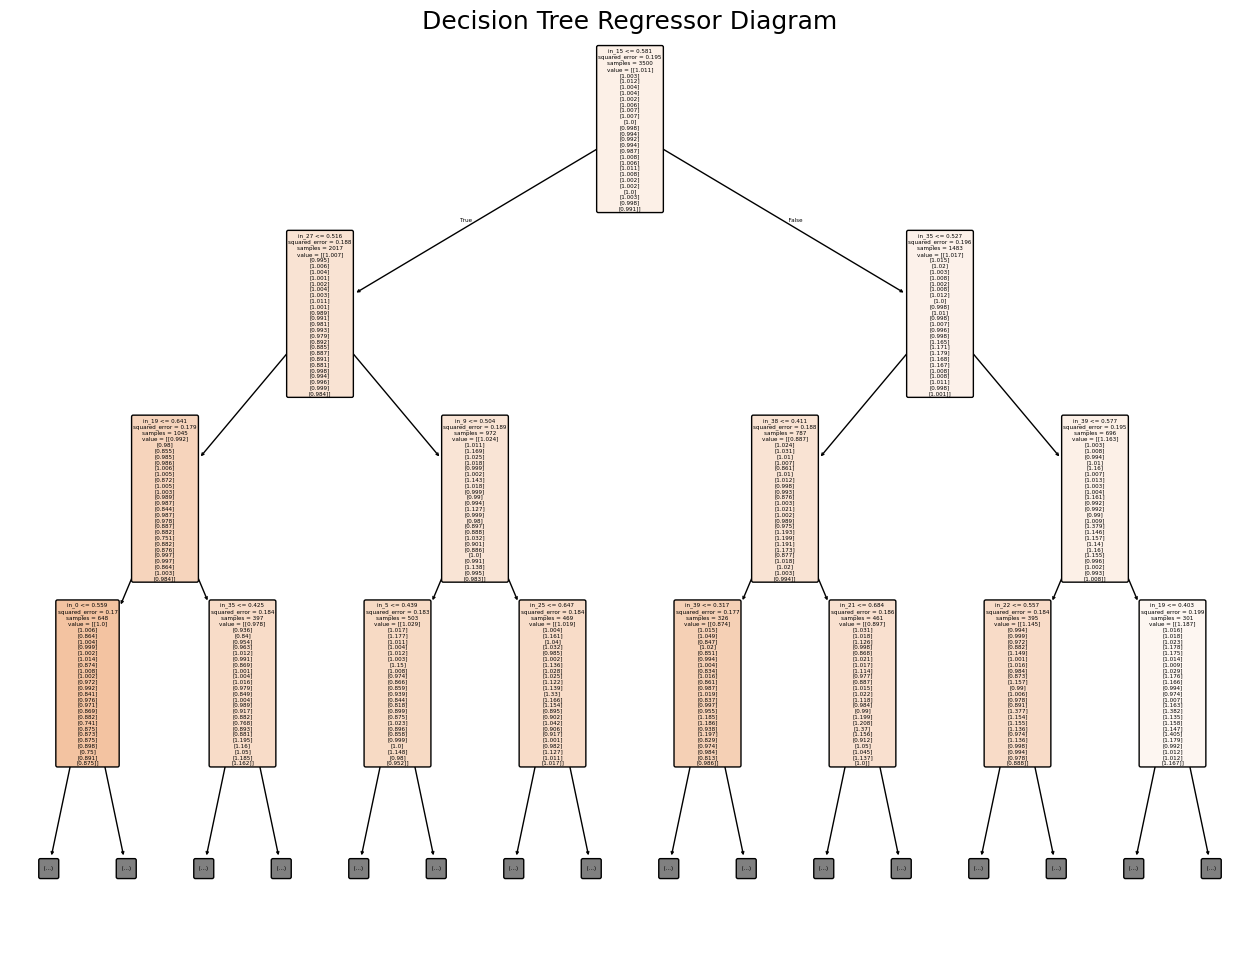

In [15]:
# Retrieve the best estimator and best max_depth found by GridSearchCV
best_max_depth = grid_search.best_params_['max_depth']
print("Best depth found:", best_max_depth)

best_dt_regressor = grid_search.best_estimator_

# Make predictions on the test set using the best found model
y_prediction = best_dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
print("Decision Tree Regressor Test MSE:", mse)
print("\n")

# Visualize the result of the best decision tree regressor
plt.figure(figsize=(16, 12))
plot_tree(best_dt_regressor, feature_names=input_columns, filled = True, rounded = True, max_depth = 3)
plt.title("Decision Tree Regressor Diagram", fontsize = 18)
plt.show()


In [16]:
# Create and train the MLP Regressor 
mlp = MLPRegressor(hidden_layer_sizes=(256,128), max_iter = 500, random_state = 42)
mlp.fit(X_train, y_train)

# Prediction on train and test sets
y_prediction_mlp_train = mlp.predict(X_train)
mse_mlp_train = mean_squared_error(y_train, y_prediction_mlp_train)

y_prediction_mlp_test = mlp.predict(X_test)
mse_mlp_test = mean_squared_error(y_test, y_prediction_mlp_test)

MLP Training MSE: 0.0194156134412013
MLP Test MSE: 0.022789989759280545 



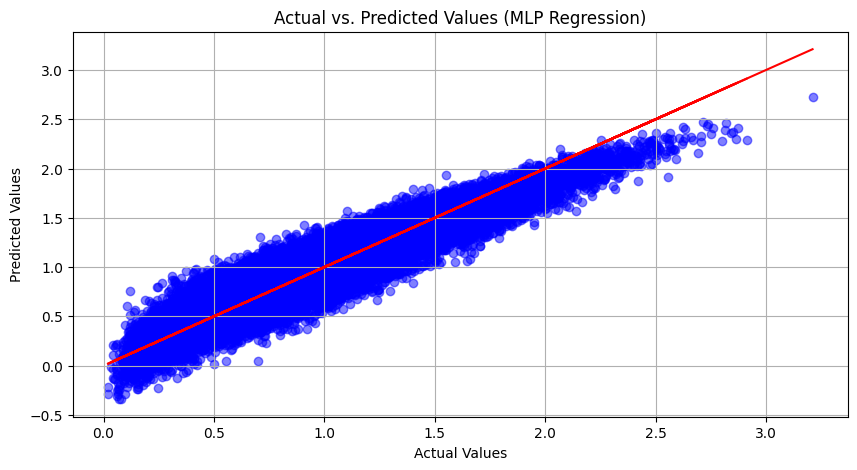

In [17]:
print("MLP Training MSE:", mse_mlp_train)
print("MLP Test MSE:", mse_mlp_test, "\n")

# Plot a graph
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_prediction_mlp_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (MLP Regression)")
plt.grid(True)
plt.show()

In [18]:
X_cv = pd.read_csv("new_input_data.csv")
y_cv = pd.read_csv("new_output_data.csv")

# Define 10 folds for cross-validation 
kf = KFold(n_splits  = 10, shuffle = True, random_state = 42)

In [19]:
# Cross-validate Decision Tree Regressor 
# Wrap DecisionTreeRegressor with MultiOutputRegressor.
dt_regressor = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))

# Perform cross validation using negative MSE, then convert it to positive MSE.
cv_scores_dt = cross_val_score(dt_regressor, X_cv, y_cv, cv = kf, scoring = 'neg_mean_squared_error', n_jobs = -1)
cv_mse_dt = -cv_scores_dt.mean()
print("Decision Tree Regressor Cross-Validation MSE:", cv_mse_dt)

# Cross-validate MLP Regressor
# Wrap MLPRegressor with MultiOutputRegressor
mlp_regressor = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes = (256, 128), max_iter = 300, early_stopping = True, random_state = 42))
cv_scores_mlp = cross_val_score(mlp_regressor, X_cv, y_cv, cv = kf, scoring = 'neg_mean_squared_error', n_jobs = -1)
cv_mse_mlp = -cv_scores_mlp.mean()
print("MLP Regressor Cross-Validation MSE:", cv_mse_mlp)


Decision Tree Regressor Cross-Validation MSE: 0.1250883352137684
MLP Regressor Cross-Validation MSE: 0.02278362670004912


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.transform import rotate

img = io.imread("Group_T.png")
plt.imshow(image)
plt.show()

NameError: name 'image' is not defined

In [22]:
# Grid dimensions: 6 rows × 9 columns
rows, cols = 6, 9
cell_h = img.shape[0] // rows
cell_w = img.shape[1] // cols

def crop_letter(img, row, col):
    """Crop a cell from the image based on the given row and column indices."""
    return img[row * cell_h:(row + 1) * cell_h, col * cell_w:(col + 1) * cell_w]

def trim_outer_space(img, trim_size=61):
    """Trim the outer borders of the image by a specified trim size."""
    h, w, _ = img.shape
    return img[trim_size:h - trim_size, trim_size:w - trim_size]

In [23]:
# Position of char of my name (row, col), rotation_angle
name_data = [
    ('P', (1, 0), -27),
    ('h', (5, 4), 25),  
    ('u', (4, 4), 23),
    ('n', (0, 4), -19),
    ('g', (2, 6), -1),
    (' ', (5, 7), 0),    
    ('Y', (0, 6), 24),
    ('u', (4, 4), 23),
    (' ', (5, 7), 0), 
    ('J', (5, 5), 28),
    ('i', (3, 6), -4),
    ('e', (4, 6), -2) 
]

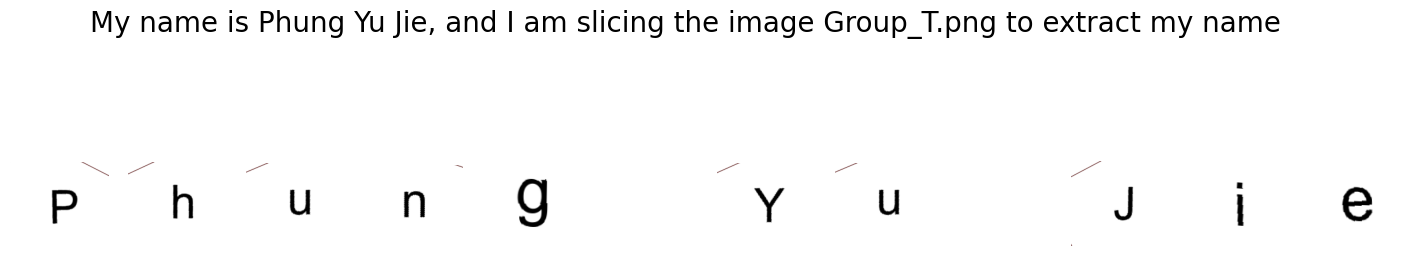

In [24]:
# Start plotting and display my name
fig, axs = plt.subplots(1, len(name_data), figsize=(18, 4))
fig.suptitle(
    "My name is Phung Yu Jie, and I am slicing the image Group_T.png to extract my name",
    fontsize=20
)

for i, (char, (row, col), degrees) in enumerate(name_data):
    # Crop the letter
    letter_img = crop_letter(img, row, col)

    if degrees != 0:
        letter_img = rotate(letter_img, angle=degrees, resize=True, mode='constant', cval=1.0)
    
    # Trim the outer space
    letter_img = trim_outer_space(letter_img, trim_size=50)
    
    axs[i].imshow(letter_img)
    axs[i].axis('off')

plt.show()

### Sanjivan Prakash

#### Task 1

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("partA.csv")

# Separate input and output columns
input_columns = [col for col in data.columns if col.startswith('in_')]
output_columns = [col for col in data.columns if col.startswith('out_')]

X = data[input_columns]
y = data[output_columns]

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on training and testing data
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print MSE results
print("Decision Tree MSE (Train):", mse_train)
print("Decision Tree MSE (Test):", mse_test)

# Visualize Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=dt_model.feature_importances_, y=input_columns)
plt.title('Feature Importance in Decision Tree Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


#### Task 2

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("partA.csv")

# Separate input and output columns
input_columns = [col for col in data.columns if col.startswith('in_')]
output_columns = [col for col in data.columns if col.startswith('out_')]

X = data[input_columns]
y = data[output_columns]

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(256, 128),
                         max_iter=500,
                         random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict on training and testing data
y_pred_train = mlp_model.predict(X_train)
y_pred_test = mlp_model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print MSE results
print("MLP Regressor MSE (Train):", mse_train)
print("MLP Regressor MSE (Test):", mse_test)


#### Task 3

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.multioutput import MultiOutputRegressor

# Load dataset
data = pd.read_csv("partA.csv")

# Separate input and output columns
input_columns = [col for col in data.columns if col.startswith('in_')]
output_columns = [col for col in data.columns if col.startswith('out_')]

X = data[input_columns]
y = data[output_columns]

# Define 10-fold cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Wrap Decision Tree Regressor for multi-output
dt_model = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))

# Perform cross-validation and compute negative MSE (convert to positive later)
dt_cv_scores = -cross_val_score(dt_model, X, y, cv=cv, scoring='neg_mean_squared_error')

# Compute average MSE for Decision Tree
dt_avg_mse = dt_cv_scores.mean()
print("Decision Tree Cross-Validation Average MSE:", dt_avg_mse)

# Wrap MLP Regressor for multi-output
mlp_model = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(256, 128),
                                              max_iter=500,
                                              random_state=42))

# Perform cross-validation and compute negative MSE (convert to positive later)
mlp_cv_scores = -cross_val_score(mlp_model, X, y, cv=cv, scoring='neg_mean_squared_error')

# Compute average MSE for MLP
mlp_avg_mse = mlp_cv_scores.mean()
print("MLP Regressor Cross-Validation Average MSE:", mlp_avg_mse)


### Athul Praveen

#### Task 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
df=pd.read_csv("partA.csv")

In [ ]:
in_ = df.filter(regex='in_')
out_ = df.filter(regex='out_')

In [ ]:
in_

In [ ]:
out_

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(in_, out_, test_size=0.3, random_state=0)

In [ ]:
# Evaluate MSE for different tree depths
mse_scores = []

for depth in range(1, 21):
    t_model = DecisionTreeRegressor(max_depth=depth, random_state=0)
    t_model.fit(x_train, y_train)
    y_pred = t_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Depth: {depth}  |  MSE: {mse:.4f}")

# Find the best depth (lowest MSE)
best_depth = mse_scores.index(min(mse_scores)) + 1
best_mse = min(mse_scores)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), mse_scores, marker='o', linestyle='-', color='tomato', label='MSE')
plt.axvline(x=best_depth, color='green', linestyle='--', label=f'Best Depth = {best_depth}')
plt.title("Decision Tree Depth vs Mean Squared Error", fontsize=14)
plt.xlabel("Tree Depth", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Final Answer Summary
print(f"Best Tree Depth: {best_depth}")
print(f"Lowest MSE: {best_mse:.4f}")

In [ ]:
# 1)
# At max_depth = 6, the model achieves the lowest mse= 0.1790

#### Task 2

In [ ]:
t_model1 = MLPRegressor(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42)
t_model1.fit(x_train, y_train)

In [ ]:
y_pred_train = t_model1.predict(x_train)
y_pred_test = t_model1.predict(x_test)

In [ ]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Print the results
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

In [ ]:
# 2)
# Test MSE: 0.02187256356090401
# Train MSE: 0.02467500341700563

#### Task 3

In [ ]:
new_in_dataset = pd.read_csv("new_input_data.csv")
new_out_dataset = pd.read_csv("new_output_data.csv")

In [ ]:
wrapped_model1 = MultiOutputRegressor(t_model1)

In [ ]:
wrapped_model1.fit(x_train, y_train)

In [ ]:
cv_scores = cross_val_score(wrapped_model1, new_in_dataset, new_out_dataset, cv=5, scoring='r2')

In [ ]:
print(cv_scores.mean())

In [ ]:
wrapped_model= MultiOutputRegressor(t_model)
wrapped_model.fit(x_train, y_train)
cv_scores = cross_val_score(wrapped_model, new_in_dataset, new_out_dataset, cv=5, scoring='r2')

In [ ]:
print(cv_scores.mean())

In [ ]:
#cv_score= 0.8941417805041034 for mlp
#cv_score= 0.31235529735804196 for DecisionTree

### Section B

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error



#Loading the Dataset

df = pd.read_csv("partB.csv")
print("Columns before renaming:", df.columns.tolist())

rename_mapping = {
    "1st Road Class": "1st_Road_Class",
    "Road Surface": "Road_Surface",
    "Lighting Conditions": "Lighting",
    "Weather Conditions": "Weather",
    "Type of Vehicle": "Type_of_Vehicle"
}
df.rename(columns=rename_mapping, inplace=True)
print("Columns after renaming:", df.columns.tolist())


#creating a 'Casualties' column by summing the number of males and femailes

if "Number of Males" in df.columns and "Number of Females" in df.columns:
    df['Casualties'] = df["Number of Males"] + df["Number of Females"]
else:
    raise ValueError("Columns for 'Number of Males' and 'Number of Females' are required to compute Casualties.")


#Drop rows with missing values
required_columns = ["Weather", "Road_Surface", "Lighting", "1st_Road_Class", "Type_of_Vehicle", "Casualties"]
df.dropna(subset=required_columns, inplace=True)

print("DataFrame shape after cleaning:", df.shape)

Columns before renaming: ['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Number of Males', 'Number of Females', 'Average Age', 'Local Authority']
Columns after renaming: ['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st_Road_Class', 'Road_Surface', 'Lighting', 'Weather', 'Type_of_Vehicle', 'Casualty Class', 'Casualty Severity', 'Number of Males', 'Number of Females', 'Average Age', 'Local Authority']
DataFrame shape after cleaning: (1907, 18)


### Task 1: Predict the casualties

In [12]:
#Predict casualties using Weather, Road_Surface, Lighting


# Define features given in cw sheet
features_q1 = ["Weather", "Road_Surface", "Lighting"]
target_q1 = "Casualties"

#create OneHotEncoder pipeline
preprocessor_q1 = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), features_q1)
    ],
    remainder="drop"
)

model_q1 = LinearRegression()

pipeline_q1 = Pipeline(steps=[
    ("preprocessor", preprocessor_q1),
    ("regressor", model_q1)
])

# Perform K-Fold Cross-Validation
kf_q1 = KFold(n_splits=10, shuffle=True, random_state=42)
scores_q1 = cross_val_score(pipeline_q1, df[features_q1], df[target_q1],
                            scoring='neg_mean_squared_error', cv=kf_q1)

print("\n--- Question 1 Results ---")
print("Features:", features_q1)
print("LinearRegression MSE scores (negative):", scores_q1)
print("Average MSE (positive):", -np.mean(scores_q1))


--- Question 1 Results ---
Features: ['Weather', 'Road_Surface', 'Lighting']
LinearRegression MSE scores (negative): [-2.69792979 -2.28246798 -3.264669   -1.53164675 -2.70577904 -1.66687257
 -1.32470532 -1.49171585 -3.50861572 -2.6511486 ]
Average MSE (positive): 2.3125550619133652


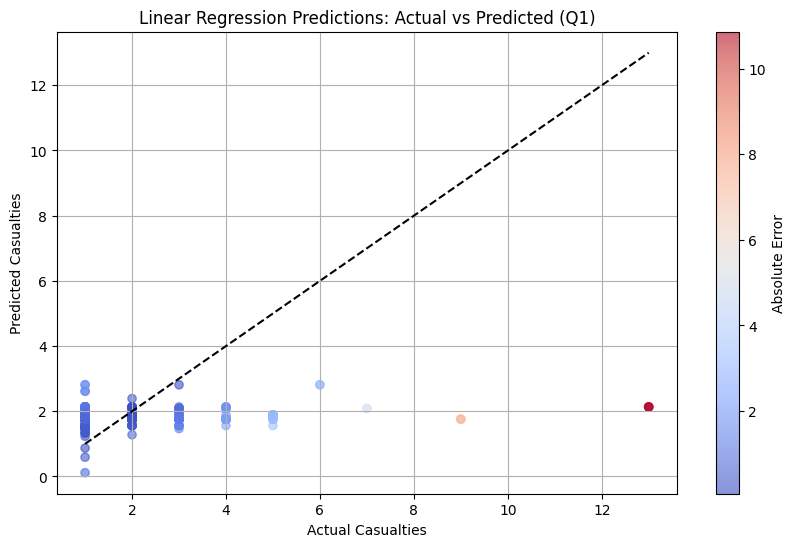

In [13]:
# Split the data for visualization purposes
X = df[features_q1]
y = df[target_q1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline_q1.fit(X_train, y_train)

# Predict
y_pred = pipeline_q1.predict(X_test)

# Create a results dataframe
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results['Abs_Error'] = np.abs(results['Actual'] - results['Predicted'])

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(results['Actual'], results['Predicted'],
                      c=results['Abs_Error'], cmap='coolwarm', alpha=0.6)
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()], 'k--')
plt.colorbar(scatter, label='Absolute Error')
plt.xlabel('Actual Casualties')
plt.ylabel('Predicted Casualties')
plt.title('Linear Regression Predictions: Actual vs Predicted (Q1)')
plt.grid(True)
plt.show()

### Discussion
#### Task 1: Linear Regression
Linear Regression model was used to predict the number of casualties based on three categorical features: weather, road surface, and lighting conditions. All features were one-hot encoded before being input into the model.

The model achieved an average Mean Squared Error (MSE) of approximately 2.31. This indicates that while the model can capture some trends from the input features, its predictive performance is limited since Task 1 only uses 3 conditions (weather, road surface, lighting) as input features, the model's performance could be improved by including additional relevant factors like vehicle type given in the partB.csv file when training the model

Overall, the results show a basic level of predictive power but highlight the need for richer input data to improve performance.

### Task 2: Decision Tree Regression

In [14]:
#Define features
features_q2 = ["Weather", "Road_Surface", "Lighting", "1st_Road_Class", "Type_of_Vehicle"]
target_q2 = "Casualties"

preprocessor_q2 = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), features_q2)
    ],
    remainder="drop"
)

# 2. Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

pipeline_q2 = Pipeline(steps=[
    ("preprocessor", preprocessor_q2),
    ("regressor", tree_regressor)
])

# 3. Cross-Validation
kf_q2 = KFold(n_splits=10, shuffle=True, random_state=42)
scores_q2 = cross_val_score(pipeline_q2, df[features_q2], df[target_q2],
                            scoring='neg_mean_squared_error', cv=kf_q2)

print("\n--- Question 2 Results ---")
print("Features:", features_q2)
print("DecisionTreeRegressor MSE scores (negative):", scores_q2)
print("Average MSE (positive):", -np.mean(scores_q2))


--- Question 2 Results ---
Features: ['Weather', 'Road_Surface', 'Lighting', '1st_Road_Class', 'Type_of_Vehicle']
DecisionTreeRegressor MSE scores (negative): [-2.25795599 -1.94034429 -2.39380358 -1.54861849 -2.24678724 -1.58492054
 -1.22821959 -1.15019897 -2.60233634 -1.99419912]
Average MSE (positive): 1.89473841422115


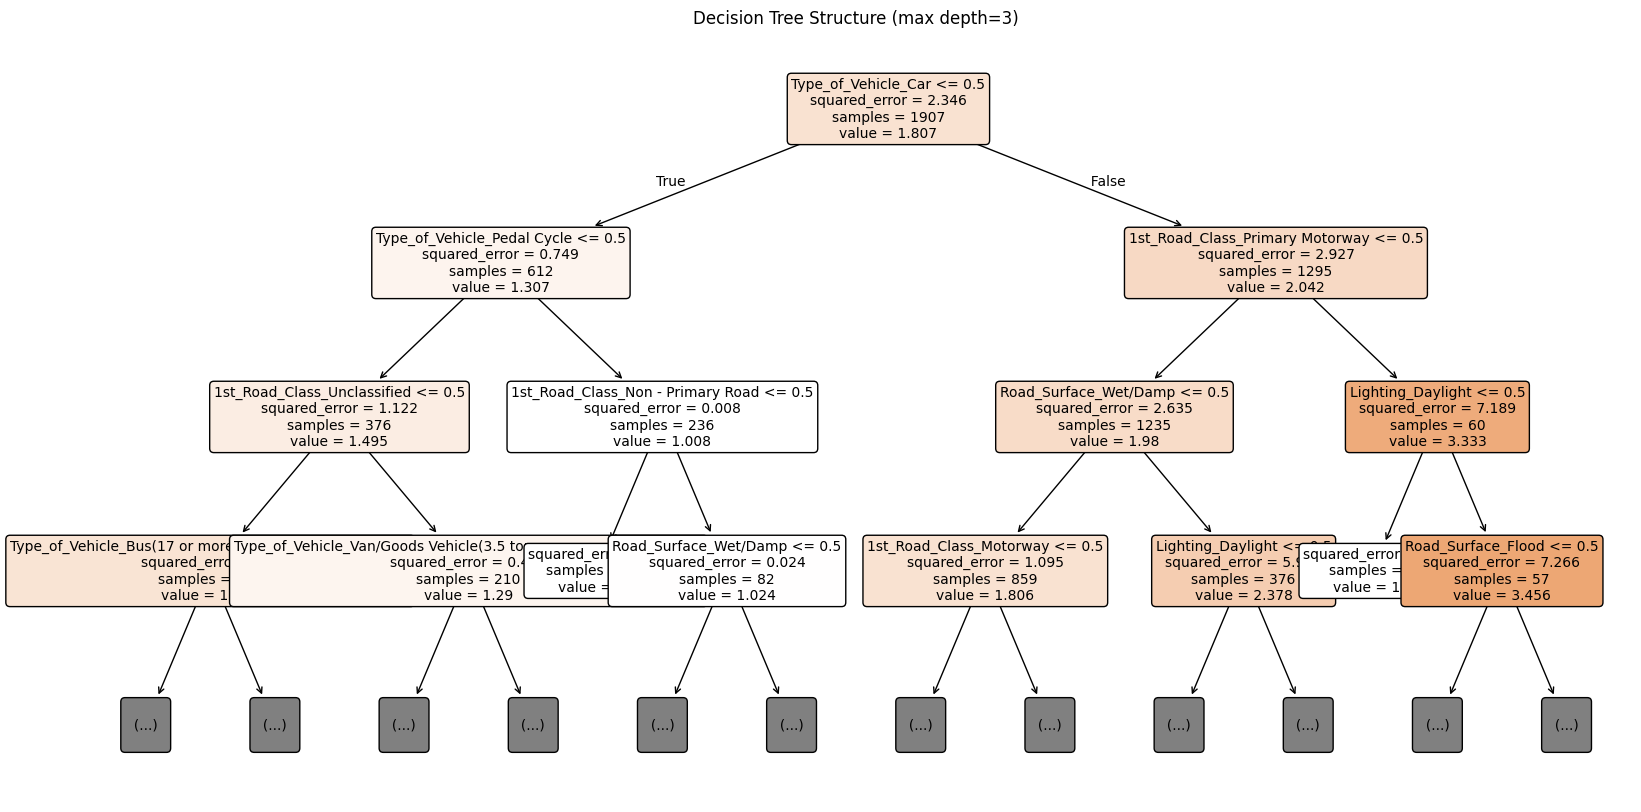

In [15]:
#Fit the pipeline
pipeline_q2.fit(df[features_q2], df[target_q2])

# etract the trained decision tree model
dt_model = pipeline_q2.named_steps["regressor"]

# get feature names after OneHotEncoding
ohe = pipeline_q2.named_steps["preprocessor"].named_transformers_["cat"]
feature_names = ohe.get_feature_names_out(features_q2)

#Plot the tree (limited to depth 3 to avoid overfitting)
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)
plt.title("Decision Tree Structure (max depth=3)")
plt.show()


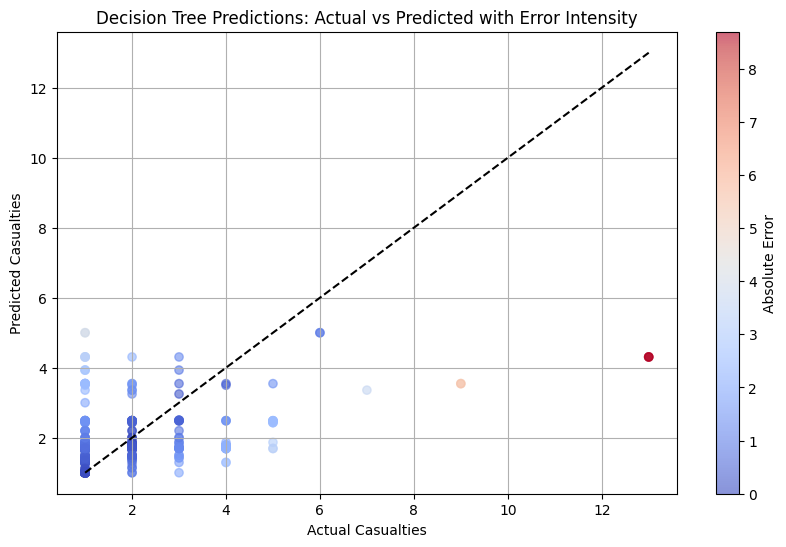

In [16]:
#Split data for visualization purposes
X_train, X_test, y_train, y_test = train_test_split(
    df[features_q2], df[target_q2], test_size=0.2, random_state=42
)

#Fit the pipeline on training data
pipeline_q2.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline_q2.predict(X_test)

#Create results DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results['Abs_Error'] = np.abs(results['Actual'] - results['Predicted'])

#Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(results['Actual'], results['Predicted'],
                      c=results['Abs_Error'], cmap='coolwarm', alpha=0.6)
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()], 'k--')
plt.colorbar(scatter, label='Absolute Error')
plt.xlabel('Actual Casualties')
plt.ylabel('Predicted Casualties')
plt.title('Decision Tree Predictions: Actual vs Predicted with Error Intensity')
plt.grid(True)
plt.show()


### Task 2
#### Decision Tree Regressor

In task 2, a Decision Tree Regressor was trained to predict the number of casualties using five categorical features (weather conditions, road surface, 1st road class, type of vehicle, and lighting conditions).

The model was regularized using parameters like max_depth=5 and min_samples_split=10 to prevent overfitting. The evaluation results showed a Mean Squared Error (MSE) of 1.89, indicating a reasonable fit to the data.

The scatter plot of actual vs predicted casualties shows that many predictions are close to the ideal diagonal line. The tree visualization at depth 3 for clarity shows how the model splits the data based on features, helping to understand its decision-making process.

However, the performance could potentially be improved with more numerical features like vehicle speed, time (24Hr) provided and control overfitting

### Task 3: Neural Network (MLP Regressor)

In [17]:
#Define features 
features_q3 = ["Weather", "Road_Surface", "Lighting", "1st_Road_Class", "Type_of_Vehicle"]
target_q3 = "Casualties"

preprocessor_q3 = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), features_q3)
    ],
    remainder="drop"
)

mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
)

pipeline_q3 = Pipeline(steps=[
    ("preprocessor", preprocessor_q3),
    ("regressor", mlp_regressor)
])

kf_q3 = KFold(n_splits=10, shuffle=True, random_state=42)
scores_q3 = cross_val_score(pipeline_q3, df[features_q3], df[target_q3],
                            scoring='neg_mean_squared_error', cv=kf_q3)

print("\n--- Question 3 Results ---")
print("Features:", features_q3)
print("MLPRegressor MSE scores (negative):", scores_q3)
print("Average MSE (positive):", -np.mean(scores_q3))


--- Question 3 Results ---
Features: ['Weather', 'Road_Surface', 'Lighting', '1st_Road_Class', 'Type_of_Vehicle']
MLPRegressor MSE scores (negative): [-2.28108264 -1.90766441 -2.40019797 -1.54072535 -2.21286872 -1.55589797
 -1.21256274 -1.17340896 -2.60180202 -1.92693685]
Average MSE (positive): 1.8813147635472405


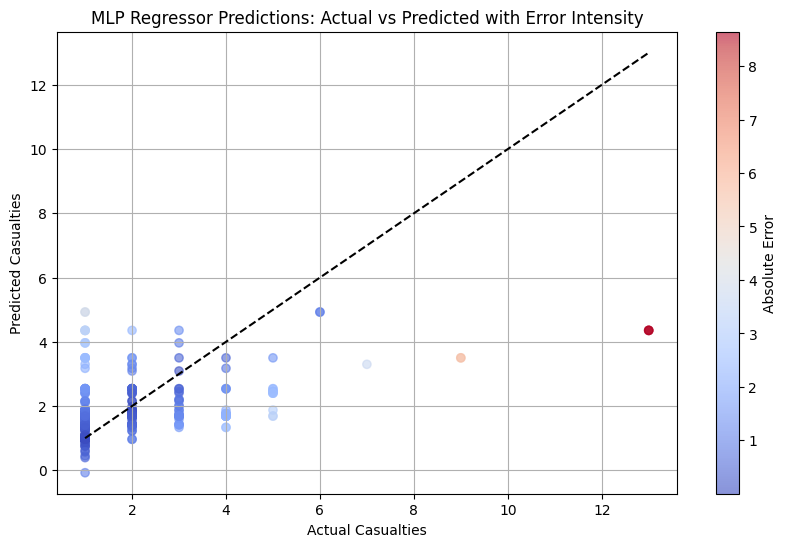

In [18]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df[features_q3], df[target_q3], test_size=0.2, random_state=42
)

#Fit the pipeline on training data
pipeline_q3.fit(X_train, y_train)

#Predict on test data
y_pred = pipeline_q3.predict(X_test)

#Create results DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results['Abs_Error'] = np.abs(results['Actual'] - results['Predicted'])

#Plot Actual vs Predicted with error color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(results['Actual'], results['Predicted'],
                      c=results['Abs_Error'], cmap='coolwarm', alpha=0.6)
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()], 'k--')
plt.colorbar(scatter, label='Absolute Error')
plt.xlabel('Actual Casualties')
plt.ylabel('Predicted Casualties')
plt.title('MLP Regressor Predictions: Actual vs Predicted with Error Intensity')
plt.grid(True)
plt.show()


### Discussion
### Task 3 Neural Network (MLP Regressor)

In task 3, a Multi-Layer Perceptron (MLP) Regressor was trained to predict the number of casualties using five categorical features (weather conditions, road surface, 1st road class, type of vehicle, and lighting conditions). All features were preprocessed using one-hot encoding before training.

The neural network was configured with two hidden layers containing 100 and 50 neurons respectively, using ReLU activation and the Adam optimizer. The evaluation results showed a Mean Squared Error (MSE) of 1.88, indicating slightly better performance compared to the decision tree.

The scatter plot of actual vs predicted casualties reveals a reasonable alignment with the diagonal line, suggesting that the model captured underlying trends in the data. However, the spread in predictions indicates that the model may still struggle with more complex or outlier cases.

Although the MLP is capable of modeling non-linear relationships, its performance could be further improved by incorporating relevant numerical features such as time (24Hr), vehicle speed, or casualty severity, which may help the model learn more patterns in the data.


### Task 4: K-Fold Cross-Validation for All Three Models

In [19]:
models_for_q4 = {
    "Linear_3Features": pipeline_q1,  # from Q1
    "DecisionTree_5Features": pipeline_q2,  # from Q2
    "MLPRegressor_5Features": pipeline_q3   # from Q3
}

print("\n--- Question 4 Results (aggregated) ---")
for model_name, pipeline_obj in models_for_q4.items():
    # Determine the features used by checking the pipeline’s ColumnTransformer
    # For clarity, cross-validation was re-run
    kf_q4 = KFold(n_splits=10, shuffle=True, random_state=42)
    scores_q4 = cross_val_score(
        pipeline_obj,
        df[pipeline_obj["preprocessor"].transformers[0][2]],  # i.e., the columns used
        df[target_q3],  # or df[target_q1] if it’s the same 'Casualties'
        scoring='neg_mean_squared_error',
        cv=kf_q4
    )
    print(f"Model: {model_name}")
    print(f"  MSE scores (negative): {scores_q4}")
    print(f"  Average MSE (positive): {-np.mean(scores_q4)}")
    print()



--- Question 4 Results (aggregated) ---
Model: Linear_3Features
  MSE scores (negative): [-2.69792979 -2.28246798 -3.264669   -1.53164675 -2.70577904 -1.66687257
 -1.32470532 -1.49171585 -3.50861572 -2.6511486 ]
  Average MSE (positive): 2.3125550619133652

Model: DecisionTree_5Features
  MSE scores (negative): [-2.25795599 -1.94034429 -2.39380358 -1.54861849 -2.24678724 -1.58492054
 -1.22821959 -1.15019897 -2.60233634 -1.99419912]
  Average MSE (positive): 1.89473841422115

Model: MLPRegressor_5Features
  MSE scores (negative): [-2.28108264 -1.90766441 -2.40019797 -1.54072535 -2.21286872 -1.55589797
 -1.21256274 -1.17340896 -2.60180202 -1.92693685]
  Average MSE (positive): 1.8813147635472405




--- Question 4 Results (aggregated) ---
Model: Linear_3Features
  MSE scores (negative): [-2.69792979 -2.28246798 -3.264669   -1.53164675 -2.70577904 -1.66687257
 -1.32470532 -1.49171585 -3.50861572 -2.6511486 ]
  Average MSE (positive): 2.3125550619133652

Model: DecisionTree_5Features
  MSE scores (negative): [-2.25795599 -1.94034429 -2.39380358 -1.54861849 -2.24678724 -1.58492054
 -1.22821959 -1.15019897 -2.60233634 -1.99419912]
  Average MSE (positive): 1.89473841422115

Model: MLPRegressor_5Features
  MSE scores (negative): [-2.28108264 -1.90766441 -2.40019797 -1.54072535 -2.21286872 -1.55589797
 -1.21256274 -1.17340896 -2.60180202 -1.92693685]
  Average MSE (positive): 1.8813147635472405



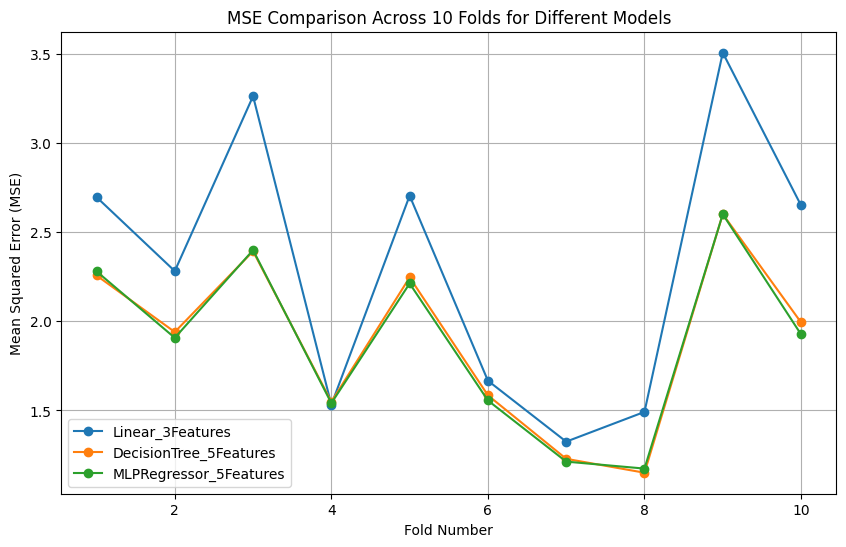

In [20]:
# Define the models for Q4
models_for_q4 = {
    "Linear_3Features": pipeline_q1,  # from Q1
    "DecisionTree_5Features": pipeline_q2,  # from Q2
    "MLPRegressor_5Features": pipeline_q3   # from Q3
}

# Initialize a dictionary to hold MSE scores for plotting
mse_scores = {}

# Calculate MSE scores for each model
print("\n--- Question 4 Results (aggregated) ---")
for model_name, pipeline_obj in models_for_q4.items():
    # Run cross-validation
    kf_q4 = KFold(n_splits=10, shuffle=True, random_state=42)
    scores_q4 = cross_val_score(
        pipeline_obj,
        df[pipeline_obj["preprocessor"].transformers[0][2]],  # i.e., the columns used
        df[target_q3],  # or df[target_q1] if it’s the same 'Casualties'
        scoring='neg_mean_squared_error',
        cv=kf_q4
    )
    
    # Store the MSE scores (make them positive by negating)
    mse_scores[model_name] = -scores_q4  # Negating to convert to positive MSE
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"  MSE scores (negative): {scores_q4}")
    print(f"  Average MSE (positive): {-np.mean(scores_q4)}")
    print()

# Plotting the MSE scores for each model
plt.figure(figsize=(10, 6))
for model_name, scores in mse_scores.items():
    plt.plot(range(1, len(scores) + 1), scores, marker='o', label=model_name)

plt.title("MSE Comparison Across 10 Folds for Different Models")
plt.xlabel("Fold Number")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()


### Discussion
#### K-Fold Cross-Validation for All Three Models
In task 4, 10-fold cross-validation was applied to evaluate the performance and generalizability of the three models: Linear Regression, Decision Tree Regressor, and MLP Regressor. This approach splits the data into 10 subsets, training the model on 9 and testing on the remaining one, repeating the process 10 times to average the results.

The Linear Regression model showed relatively consistent performance across folds, with moderate errors, indicating that it generalizes well but may struggle to capture complex patterns due to its simplicity.

The Decision Tree model showed slightly higher variability across folds, suggesting sensitivity to the specific training subsets. While its interpretability is a strength, its performance can fluctuate if overfitting is not controlled.

The MLP Regressor achieved the lowest average error among the three models, benefiting from its ability to learn non-linear relationships. However, it also showed some variability across folds, likely due to its complexity and the categorical nature of the input features.

Overall, cross-validation confirmed that while all three models perform reasonably, the MLP Regressor has the best potential for predictive accuracy, especially if they are enhanced with additional numerical features. Cross-validation also highlighted the importance of model regularization and balanced feature selection to ensure stability across different data splits

### Task 5: Error Analysis for Neural Network

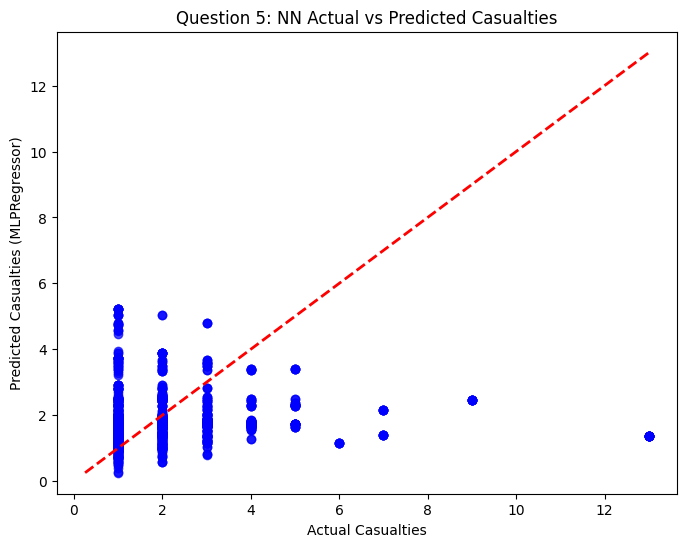

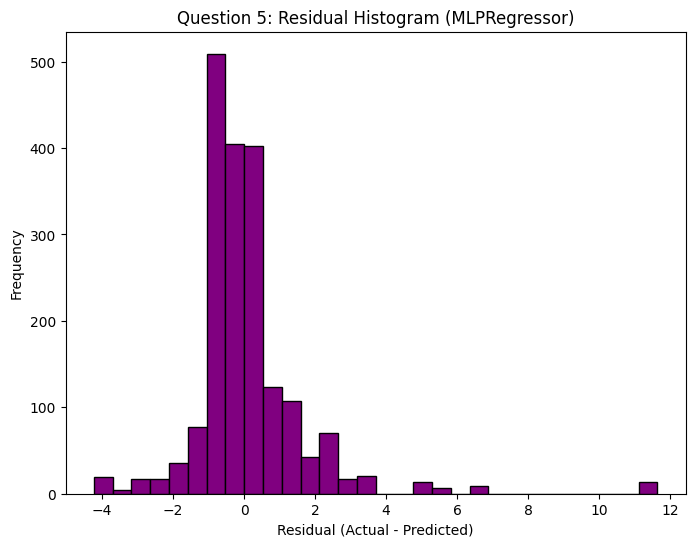

Number of predictions with residual > 3 casualties: 87


In [21]:
# We use the pipeline from Q3 (Neural Network)
nn_pipeline = pipeline_q3

# Obtain cross-validated predictions
y_pred = cross_val_predict(nn_pipeline, df[features_q3], df[target_q3], cv=10)

#Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(df[target_q3], y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Casualties")
plt.ylabel("Predicted Casualties (MLPRegressor)")
plt.title("Question 5: NN Actual vs Predicted Casualties")

min_val = min(df[target_q3].min(), y_pred.min())
max_val = max(df[target_q3].max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.show()

#Residual analysis
residuals = df[target_q3] - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', color='purple')
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Question 5: Residual Histogram (MLPRegressor)")
plt.show()

#Observations about “slight” vs. “serious” casualties
large_error_threshold = 3  
large_errors = df[abs(residuals) > large_error_threshold]
print("Number of predictions with residual > 3 casualties:", len(large_errors))

### Discussion
#### Task 5 Error Analysis for Neural Network

The scatter plot of actual vs. predicted casualties shows that the neural network model (MLPRegressor) captures general trends well, especially for lower casualty counts. However, predictions deviate more as casualty numbers increase, indicating reduced accuracy for serious accidents.

The residual histogram is roughly centered around zero, suggesting balanced predictions overall. Still, several predictions have large errors (residual > 3), highlighting the model's difficulty in handling severe cases.

In summary, the model performs reasonably for slight accidents but struggles with more complex or rare serious cases. Further improvements could include more features or rebalancing the dataset.